In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('/content/car data.csv')


In [7]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [10]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


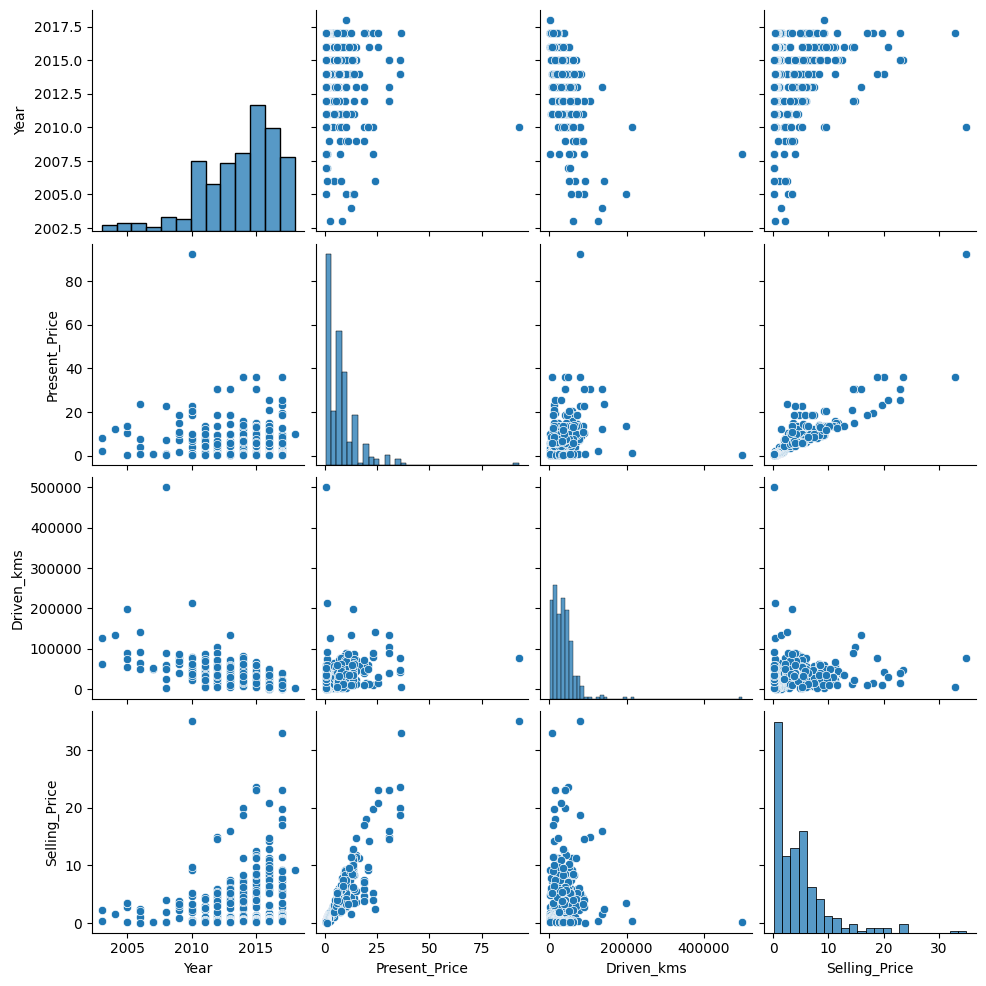

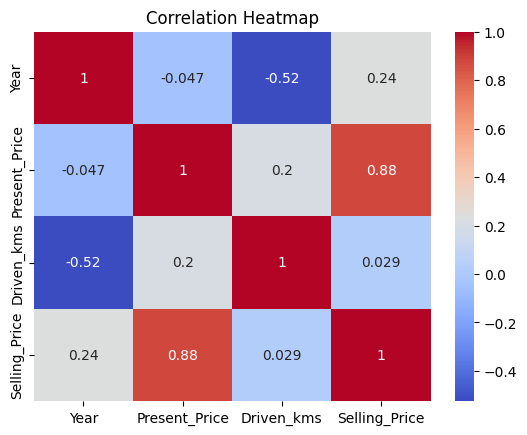

In [11]:
print("Missing Values:")
print(df.isnull().sum())

# Drop any rows with missing values for simplicity
df = df.dropna()

# Perform exploratory data analysis (EDA)
# Visualize the relationship between features and the target variable (Selling_Price)
sns.pairplot(df[['Year', 'Present_Price', 'Driven_kms', 'Selling_Price']])
plt.show()

# Correlation heatmap
correlation_matrix = df[['Year', 'Present_Price', 'Driven_kms', 'Selling_Price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preprocessing
# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

In [12]:
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)  # Remove 'Car_Name' as it's not a relevant feature
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [13]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Display the coefficients (importance) of each feature
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print("Feature Coefficients:")
print(coefficients)

Mean Absolute Error: 1.2163740193330423
Feature Coefficients:
                   Feature  Coefficient
1            Present_Price     3.849251
0                     Year     1.016000
4         Fuel_Type_Diesel     0.989405
5         Fuel_Type_Petrol     0.293327
3                    Owner    -0.243684
2               Driven_kms    -0.258154
7      Transmission_Manual    -0.542403
6  Selling_type_Individual    -0.571405


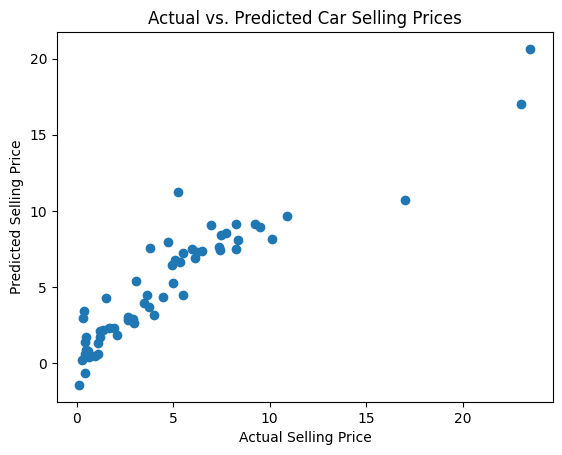

In [14]:
# Visualize actual vs. predicted prices
plt.scatter(y_test, predictions)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs. Predicted Car Selling Prices')
plt.show()